### ***Import working Libraries***

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 

### ***Load the dataset***

In [2]:
df= pd.read_excel("E://Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ***Data Inspection***

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 928.2+ KB


In [4]:
df.shape 

(10799, 11)

In [5]:
df.dtypes 

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [6]:
df.describe() 

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isnull().sum() 

Airline            116
Date_of_Journey    116
Source             116
Destination        116
Route              117
Dep_Time           116
Arrival_Time       116
Duration           116
Total_Stops        117
Additional_Info    116
Price              116
dtype: int64

In [8]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Number of Flights by Stoppages:-**

***Flight Count by the number of Stops***    

In [10]:
Stoppages_counts= df["Total_Stops"].value_counts()
Stoppages_counts 

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

### Visualising number of Stoppages flights by using (Bar Plot)

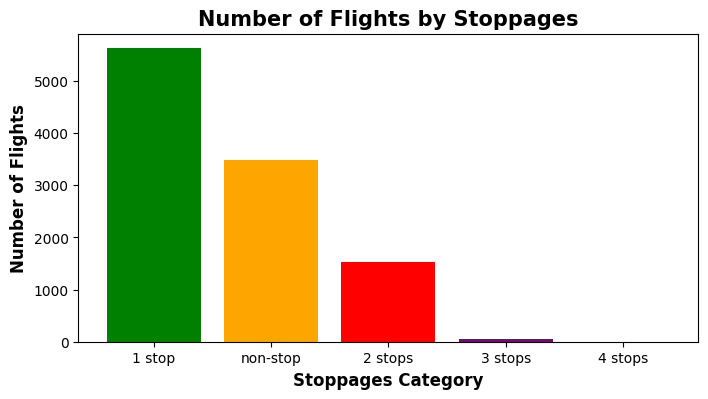

In [11]:
plt.figure(figsize=(8,4))
plt.bar(Stoppages_counts .index,Stoppages_counts.values ,color=["green","orange","red","purple","blue"])
plt.title("Number of Flights by Stoppages",fontsize=15,fontweight="bold")
plt.xlabel("Stoppages Category",fontsize=12,fontweight="bold")
plt.ylabel("Number of Flights",fontsize=12,fontweight="bold")
plt.xticks(rotation=0)
plt.show()

### Explanation
***count flights using python***
* we used the built-in value_counts()function to count number of flights


***Graphical representation:-*** 
* We visualize this data using a bar plot, which clearly shows all the categories:
* Non-stops, 1-stop,2-stop and 3-stop
* 1-stop flights have the highest number of flights (5625).
* Non-stop flights have the second highest number (3491).
* 2-stop flights have fewer flights
*  3-stop flights have have the least number of flights and 4-stop has no record.


### **Most Expensive and Cheapest Flights**

***Most Expensive Flights***

In [12]:
Expensive_flights=df[df["Price"]==df["Price"].max()]
Expensive_flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0


***Cheapest Flights***

In [13]:
cheapest_flights=df[df["Price"]==df["Price"].min()]
cheapest_flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759.0
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759.0
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759.0
10567,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759.0


In [14]:
# Finding Cheapest and Most Expensive Flight Prices
cheapest_price = df["Price"].min()
expensive_price = df["Price"].max()

### Comparsion of Cheapest and Most expensive Flights

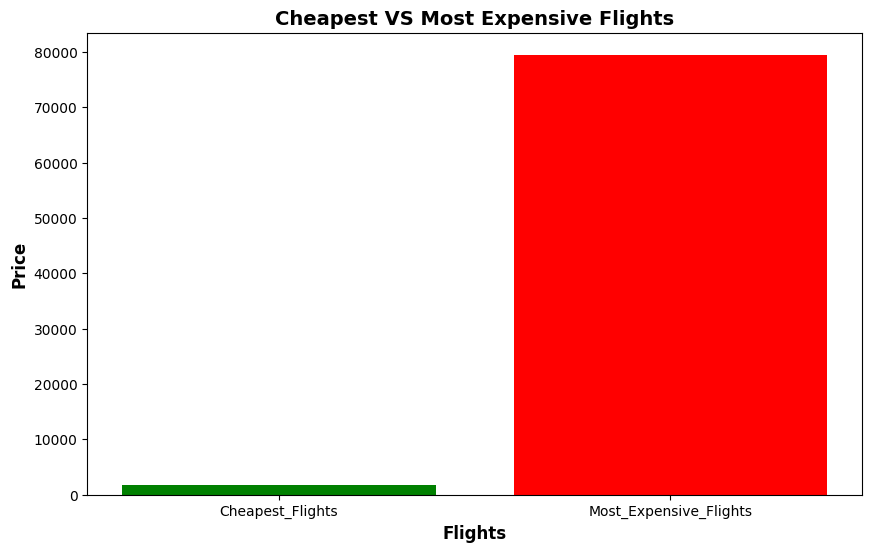

In [15]:
x=["Cheapest_Flights", "Most_Expensive_Flights"]
y=[cheapest_price,expensive_price]
plt.figure(figsize=(10,6))
plt.bar(x,y,color=["g","r"])
plt.title("Cheapest VS Most Expensive Flights",fontsize=14,fontweight="bold")
plt.xlabel("Flights",fontsize=12,fontweight="bold")
plt.ylabel("Price",fontsize=12,fontweight="bold")
plt.show()

# Explantion
* We used max() to find the flight with the maximum price (most expensive flight ).
* We used min() to find the flight with the minimum price (cheapest flight).
# Purpose of this analysis
This helps us understand the price range of flights in the dataset by identifying the lowest and highest fares.

# Visualization
* The prices of the cheapest and most expensive flights are visualized using a bar plot.
* The graph clearly show that the most  expensive flight price is much higher than the cheapest flight price, indicating a large variation in flight     fares.

**This analysis and visualization make it easy to compare extreme flight prices and understand how flight fares vary in the dataset.**

### **Variation of Flight Prices by Source**

In [16]:
price_stats=  df.groupby("Source")["Price"].describe()
price_stats

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
Banglore,2197.0,8017.464269,5964.303079,3257.0,4544.0,6121.0,8714.0,79512.0
Chennai,381.0,4789.892388,2190.219021,3145.0,3597.0,3850.0,5277.0,19630.0
Delhi,4537.0,10539.439057,3781.948512,3876.0,7202.0,10262.0,13344.0,52285.0
Kolkata,2871.0,9158.389411,3741.997070,3480.0,5192.0,9345.0,12681.0,31945.0
Mumbai,697.0,5059.708752,4100.504092,1759.0,2647.0,3342.0,5678.0,25139.0


**Varitaion of Flights Prices by sources using by (Box-plot) visulization**

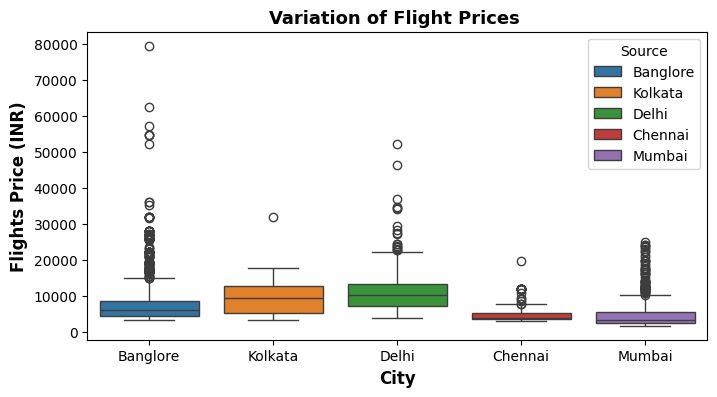

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Source",y="Price",hue="Source",data=df)
plt.title("Variation of Flight Prices ",fontsize=13,fontweight="bold")
plt.xlabel("City",fontsize=12,fontweight="bold")
plt.ylabel("Flights Price (INR)",fontsize=12,fontweight="bold")
plt.show()

# Explanation

* Flights are grouped by Source city to analyze prices.
* We calculated average, minimum, and maximum prices for each city.
* 
  **Purpose**
* This helps us understand which source cities have more expensive or cheaper flights.
  It also shows how flight prices vary by source city.
# Visualization

* A boxplot is used to show the distribution of flight prices for each source city.
The boxplot displays the median, quartiles, and outliers.
Different colours are used for each city for clarity.


  **Some source cities have higher flight prices, while others have lower prices.
  The plot clearly shows variation in prices, making comparison easy.**


## **Extracting Journey Day and Month**

 **converting into datetime format** 

In [18]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")
df["Date_of_Journey"] 

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10794          NaT
10795          NaT
10796          NaT
10797          NaT
10798          NaT
Name: Date_of_Journey, Length: 10799, dtype: datetime64[ns]

#### Extract day of week and month name from the Date_of_Journey column

### **Extract Days and month**

In [19]:
# Extract days
df["day_of_week"]=df["Journey_day"]=df["Date_of_Journey"].dt.day_name()
df["day_of_week"].head(5)

0       Sunday
1    Wednesday
2       Sunday
3       Sunday
4       Friday
Name: day_of_week, dtype: object

In [20]:
# Extract months name
df["month"]=df["Journey_month"]=df["Date_of_Journey"].dt.month_name()
df["month"].head(5)

0    March
1      May
2     June
3      May
4    March
Name: month, dtype: object

**count the number of flights by Days of week**

In [21]:
fligths_by_day=df["day_of_week"].value_counts()
fligths_by_day

day_of_week
Wednesday    2079
Monday       1850
Thursday     1832
Saturday     1670
Sunday       1474
Friday        909
Tuesday       869
Name: count, dtype: int64

**count the number of flights per months**

In [22]:
fligths_by_month= df["month"].value_counts()
fligths_by_month

month
May      3466
June     3414
March    2724
April    1079
Name: count, dtype: int64

#### **Visualising Flights by Day of Week**

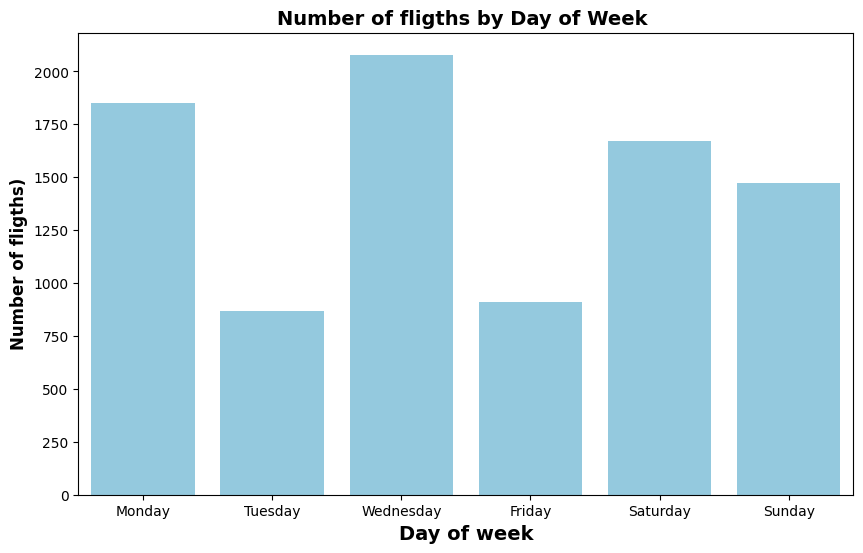

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=fligths_by_day.index,y=fligths_by_day.values,order=["Monday","Tuesday","Wednesday","Friday","Saturday","Sunday"],color="skyblue")
plt.title("Number of fligths by Day of Week ",fontsize=14,fontweight="bold")
plt.xlabel("Day of week",fontsize=14,fontweight="bold")
plt.ylabel("Number of fligths)",fontsize=12,fontweight="bold")
plt.show()

#### **Visualising Flights by Month**

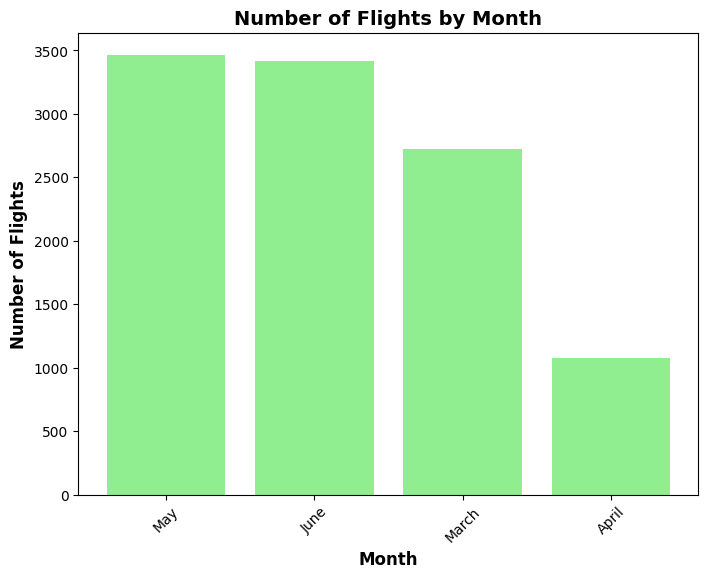

In [24]:
plt.figure(figsize=(8,6))
plt.bar(fligths_by_month.index, fligths_by_month.values, color="lightgreen")
plt.title("Number of Flights by Month", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Number of Flights", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

# Explantion
* 1. converted the "Date_of_Journey" column in datetime format.
* 2. Extracted Journey day and Journey month into separate columns
* 3. Summarized the number of flights by day of week and month
   
   **Observation**
*  Month: May has the highest number of flights (3,466), June next highest (3,414), January the fewest (431),likely due to peak summer travel demand
* Day of Week: flights are highest on (wednesday and monday). Weekend days(saturday and sunday) also show relatively higher flights counts,while
tuesday has the fewer flights.

# Visualization
* Bar plots were used to clearly show month-wise and day-wise flight trends Different colors were used for comaparsion

## **Day and Month with Maximum Stoppages**

**number of flights having 1 or more stops**

In [25]:
stoppage_flight=df[df["Total_Stops"]!="non-stop"]
stoppage_flight.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,Journey_day,month,Journey_month
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Wednesday,Wednesday,May,May


**Day with maximum stoppage flights count**

In [26]:
day_count = stoppage_flight["Journey_day"].value_counts()
day_count

Journey_day
Wednesday    1531
Thursday     1386
Monday       1231
Saturday     1108
Sunday        954
Tuesday       580
Friday        402
Name: count, dtype: int64

#### **month-wise stoppage flights count**

In [27]:
month_count = stoppage_flight["Journey_month"].value_counts()
month_count

Journey_month
May      2480
June     2384
March    1942
April     386
Name: count, dtype: int64

### ***day with maximum stopages***

In [28]:
day_count.idxmax(),day_count.max()

('Wednesday', 1531)

### ***month with maximum stopages***

In [29]:
month_count.idxmax(),month_count.max()

('May', 2480)

# **Day-wise flights with one or more stppages** 

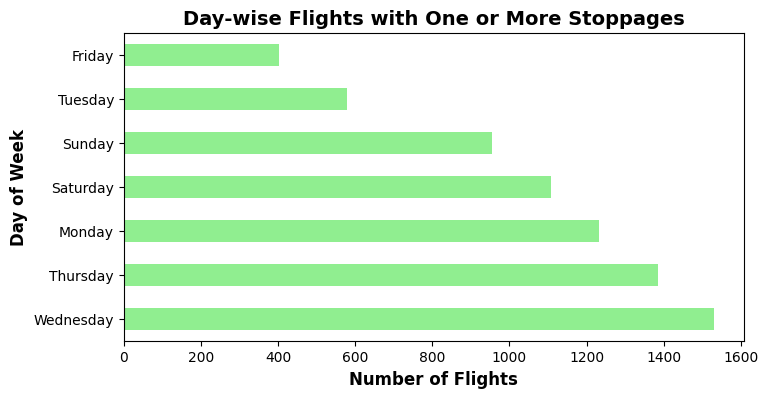

In [30]:
plt.figure(figsize=(8,4))
day_count.plot(kind="barh",color="lightgreen")
plt.title("Day-wise Flights with One or More Stoppages",fontsize=14,fontweight="bold")
plt.xlabel("Number of Flights",fontsize=12,fontweight="bold")
plt.ylabel("Day of Week",fontsize=12,fontweight="bold")
plt.show()

# **Month-wise flights with one or more stppages** 

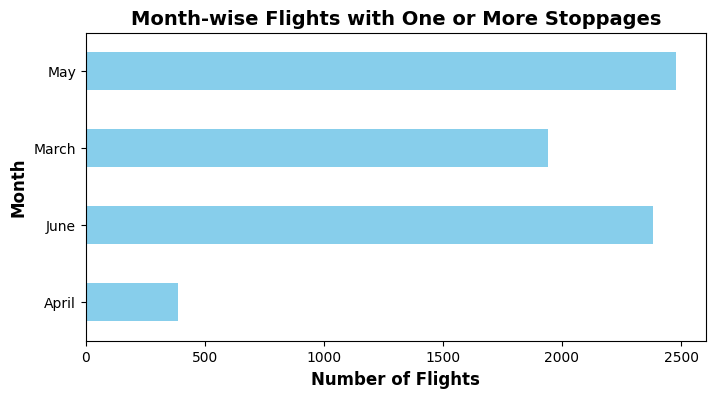

In [31]:
plt.figure(figsize=(8,4))
month_count.sort_index().plot(kind="barh",color="skyblue")
plt.title("Month-wise Flights with One or More Stoppages",fontsize=14,fontweight="bold")
plt.xlabel("Number of Flights",fontsize=12,fontweight="bold")
plt.ylabel("Month",fontsize=12,fontweight="bold")
plt.show()

# Explantion
* Use the prepared date features The Date_of_Journey column was already converted into datetime format in a previous step.
* Using this, the day of the week and month information was available for each flight.
* 1. Filter flights with stoppages
 Since this analysis focuses only on flights with one or more stoppages,all non-stop flights were removed from the dataset.
*  2. Day-wise analysis
From the filtered data, the number of flights with one or more stoppages
was counted for each day of the week.
This helps identify which day has the highest number of multi-stop flights.

* 3.  Month-wise analysis
Similarly, the number of flights with one or more stoppages
was counted for each month.
This helps identify the month with the maximum stoppage flights.

* 4. Identify maximum values
The day and month with the highest counts were selected
as the final result of the analysis.

  5.  **Visualization**
*Bar charts were used to visualize both day-wise and month-wise
flights with one or more stoppages, making the comparison easy to understand.


##### **Day: Wednesday has the highest number of flights with one or more stoppages.**
##### **month: May has the highest number of flights with one or more stoppages.**


#### **Flight Availability by Source and Destination:**

In [32]:
route_count= df.groupby(["Source", "Destination"]).size().reset_index(name="Flight_Count")
route_count

,Source,Destination,Flight_Count
0,Banglore,Delhi,1265
1,Banglore,New Delhi,932
2,Chennai,Kolkata,381
3,Delhi,Cochin,4537
4,Kolkata,Banglore,2871
5,Mumbai,Hyderabad,697


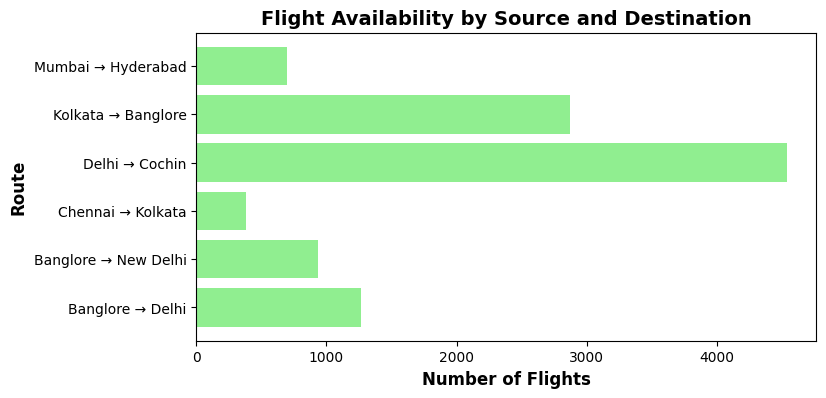

In [33]:
plt.figure(figsize=(8,4))
plt.barh(route_count["Source"] + " → " + route_count["Destination"],route_count["Flight_Count"],color="lightgreen")
plt.title("Flight Availability by Source and Destination",fontsize=14,fontweight="bold")
plt.xlabel("Number of Flights",fontsize=12,fontweight="bold")
plt.ylabel("Route",fontsize=12,fontweight="bold")
plt.show()

# Explantion

* The Source and Destination columns were used to identify flight routes.
* Flights were grouped by Source → Destination to represent each route.
* The number of flights was counted for each route to measure flight availability.
* This helps us compare to routes with higher and lower numbers of flights.
* visualization:- A bar chart was used to visualize flight availability across routes.


## ***Average price by Airline :-***

In [34]:
avg_price=df.groupby("Airline")["Price"].mean()
avg_price

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

## **Visualising using horizontal bar chart---**

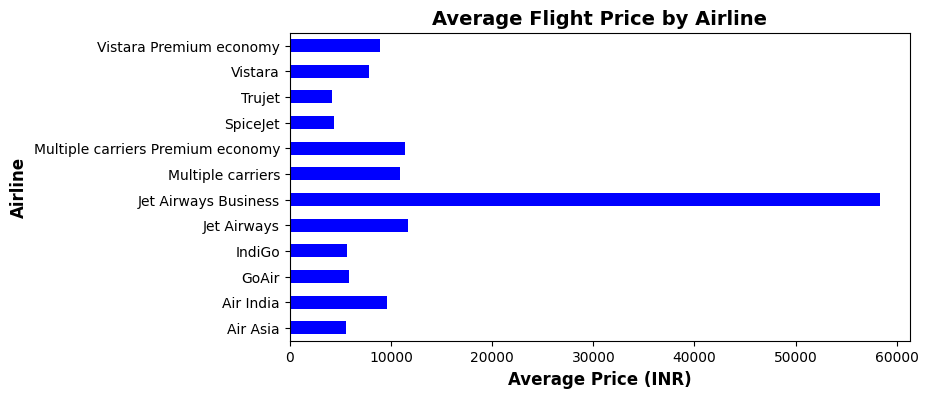

In [35]:
plt.figure(figsize=(8,4))
avg_price.plot(kind="barh", color="blue")
plt.title("Average Flight Price by Airline", fontsize=14, fontweight="bold")
plt.xlabel("Average Price (INR)", fontsize=12, fontweight="bold")
plt.ylabel("Airline", fontsize=12, fontweight="bold")
plt.show()

### **Explantion**
* Flights were grouped by airline and the average ticket price was calculated for each airline.
* This analysis helps compare airlines based on their average fares.
* A horizontal bar chart was used to clearly visualize the price differences among airlines.

### **Flight Duration vs Price**

#### **problem:-- The duration column was in text format then which cannot be directly used to numericl analysis**

In [36]:

df["Duration"].head(5)

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

### **1.Extract Hours and Minutes** 
* We extracted hours and minutes separately from the Duration column using regular expressions.

In [37]:
df["Duration_hours"] = df["Duration"].str.extract(r"(\d+)h").astype(float)
df["Duration_minutes"] = df["Duration"].str.extract(r"(\d+)m").astype(float)

#### **2. missing value fill with 0**
* some flights may have only hours or only minutes

In [38]:
df["Duration_hours"] = df["Duration_hours"].fillna(0)
df["Duration_minutes"] = df["Duration_minutes"].fillna(0)

### ***3. convert total duration into minutes***
* total duration was cal by converting hour into mint

In [39]:
df["Duration"]=df["Duration_hours"]*60+df["Duration_minutes"]

In [40]:
df["Duration"].head(5)

0     170.0
1     445.0
2    1140.0
3     325.0
4     285.0
Name: Duration, dtype: float64

* The duration column is now fully numeric in minutes 

## ***Duration VS Price***

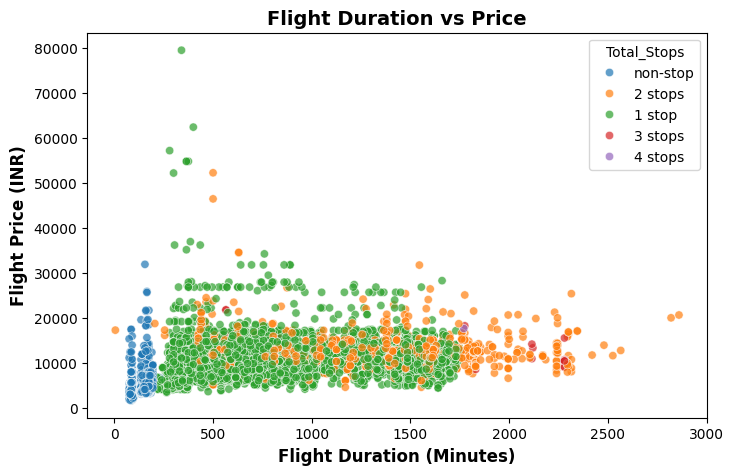

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x="Duration",y="Price",hue="Total_Stops",alpha=0.7)
plt.title("Flight Duration vs Price", fontsize=14, fontweight="bold")
plt.xlabel("Flight Duration (Minutes)", fontsize=12, fontweight="bold")
plt.ylabel("Flight Price (INR)", fontsize=12, fontweight="bold")
plt.show()

### ***Most Popular Routes***

**top 5 most frequent routes**

In [62]:
df["Route"]=df["Source"]+ "" +df["Destination"]
df["Route"].head(5)

0    BangloreNew Delhi
1      KolkataBanglore
2          DelhiCochin
3      KolkataBanglore
4    BangloreNew Delhi
Name: Route, dtype: object

In [63]:
top_routes=df["Route"].value_counts()
top_routes

Route
DelhiCochin          4537
KolkataBanglore      2871
BangloreDelhi        1265
BangloreNew Delhi     932
MumbaiHyderabad       697
ChennaiKolkata        381
Name: count, dtype: int64

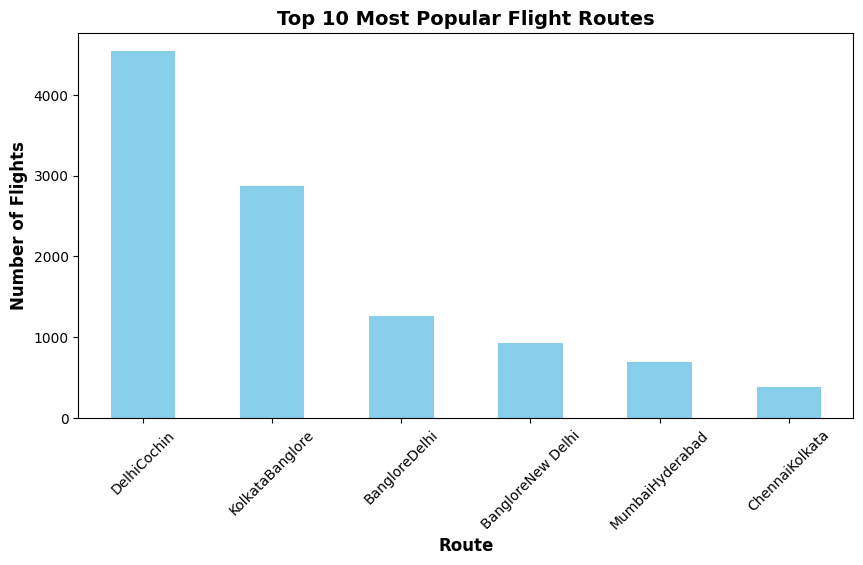

In [64]:
plt.figure(figsize=(10,5))
top_routes.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Popular Flight Routes", fontsize=14, fontweight="bold")
plt.xlabel("Route", fontsize=12, fontweight="bold")
plt.ylabel("Number of Flights", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

## **Impact of Additional Info**

In [65]:
df["Additional_Info"].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

**calculating average price**

In [66]:
price_info = df.groupby("Additional_Info")["Price"].mean().sort_values(ascending=False)
price_info

Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9471.834511
No info                          9141.320192
No Info                          8044.666667
No check-in baggage included     3645.156250
Name: Price, dtype: float64

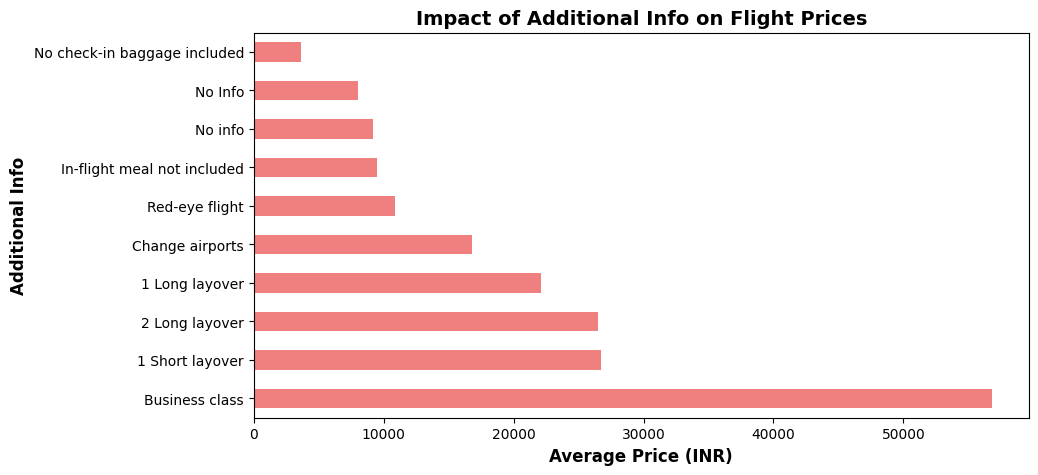

In [67]:
plt.figure(figsize=(10,5))
price_info.plot(kind="barh", color="lightcoral")
plt.title("Impact of Additional Info on Flight Prices", fontsize=14, fontweight="bold")
plt.xlabel("Average Price (INR)", fontsize=12, fontweight="bold")
plt.ylabel("Additional Info", fontsize=12, fontweight="bold")
plt.show()

# **Explantaion** 
* We analyzed how different categories in Additional_Info affect flight prices.
* Flights with “Business class” have the highest average prices, while “No check-in baggage included” flights have the lowest, indicating budget options

### ***Interesting Fact from flight data***

***most popular Route***

In [69]:
df["Route"] = df["Source"] + " → " + df["Destination"]
df["Route"]

0        Banglore → New Delhi
1          Kolkata → Banglore
2              Delhi → Cochin
3          Kolkata → Banglore
4        Banglore → New Delhi
                 ...         
10794                     NaN
10795                     NaN
10796                     NaN
10797                     NaN
10798                     NaN
Name: Route, Length: 10799, dtype: object

### ***top 5 most frequent routes***

In [76]:
df["Route"]=df["Source"]+ "" +df["Destination"]
df["Route"].head(5)

0    BangloreNew Delhi
1      KolkataBanglore
2          DelhiCochin
3      KolkataBanglore
4    BangloreNew Delhi
Name: Route, dtype: object

### ***Top Most Popular Routes***

In [70]:
top_routes=df["Route"].value_counts().idxmax()
top_routes

'Delhi → Cochin'

### ***Number of Flights***

In [71]:
flight=df["Route"].value_counts().max()
flight

4537

***Most Expensive and Cheapest Additional***

In [72]:
price_info = df.groupby("Additional_Info")["Price"].mean().sort_values(ascending=False)
price_info

Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9471.834511
No info                          9141.320192
No Info                          8044.666667
No check-in baggage included     3645.156250
Name: Price, dtype: float64

### ***Most Expensive flight***

In [73]:
most_expensive_info=price_info.idxmax()
most_expensive_info

'Business class'

In [74]:
cheapest_info=price_info.idxmin()
cheapest_info

'No check-in baggage included'

### ***Cheapest flight***

In [75]:
lowest_price=price_info.min()
lowest_price

3645.15625

### ***Stop vs Price***

In [79]:
df.groupby("Total_Stops")["Price"].mean().sort_values()

Total_Stops
non-stop     5024.900315
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
Name: Price, dtype: float64

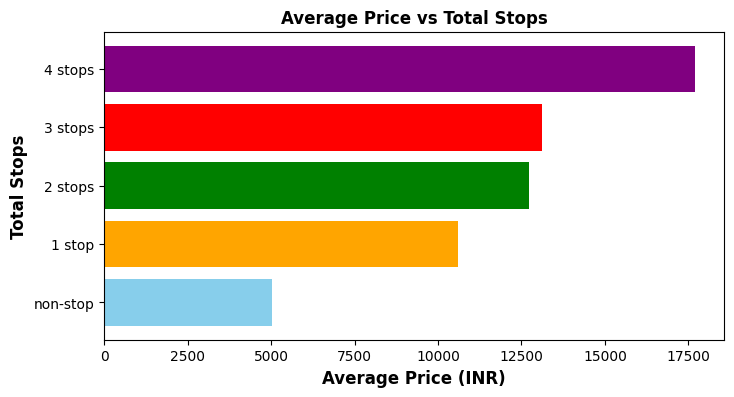

In [85]:
stop_price = df.groupby("Total_Stops")["Price"].mean().sort_values()
plt.figure(figsize=(8,4))
colors = ["skyblue", "orange", "green", "red", "purple"]
plt.barh(stop_price.index, stop_price.values, color=colors)
plt.title("Average Price vs Total Stops",fontsize=12, fontweight="bold")
plt.xlabel("Average Price (INR)",fontsize=12, fontweight="bold")
plt.ylabel("Total Stops",fontsize=12, fontweight="bold")
plt.show()

### ***Flights with more stops tend to have higher average prices compared to non-stops flights....***